In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data_ob = data.select_dtypes(object)

In [15]:
data_ob.columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
for col in data_ob:
    data_ob[col] = le.fit_transform(data_ob[col])

In [20]:
data_num = data.select_dtypes(["int64"])
data_float = data.select_dtypes(["float64"])

In [21]:
data_float.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [22]:
data_new = pd.concat([data_num, data_ob, data_float], axis = 1)
data_new.head()

,step,isFraud,isFlaggedFraud,type,nameOrig,nameDest,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,0,0,3,757869,1662094,9839.64,170136.0,160296.36,0.0,0.0
1,1,0,0,3,2188998,1733924,1864.28,21249.0,19384.72,0.0,0.0
2,1,1,0,4,1002156,439685,181.00,181.0,0.00,0.0,0.0
3,1,1,0,1,5828262,391696,181.00,181.0,0.00,21182.0,0.0
4,1,0,0,3,3445981,828919,11668.14,41554.0,29885.86,0.0,0.0


In [27]:
x = data_new.drop(["isFraud"], axis = 1)
y = data_new["isFraud"]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [35]:
from sklearn.linear_model import LogisticRegression
xtrain, ytrain = shuffle(xtrain, ytrain, random_state=42)
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

D:\python2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
from sklearn.metrics import accuracy_score
ypred = lr.predict(xtest)
accuracy = accuracy_score(ytest, ypred)

In [49]:
accuracy_perfect = (accuracy)*100

<Axes: >

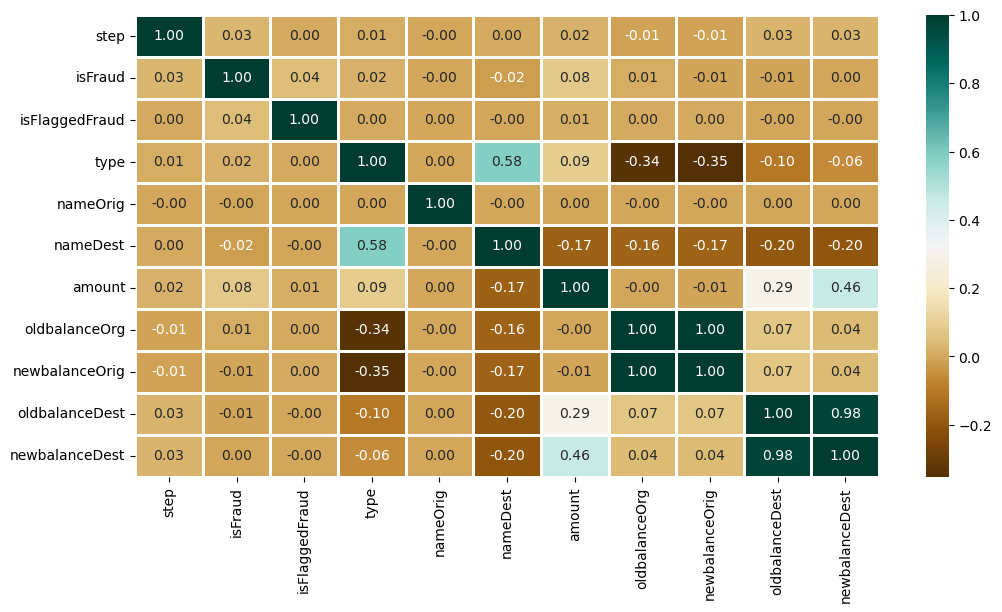

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(data_new.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<Figure size 1500x600 with 0 Axes>

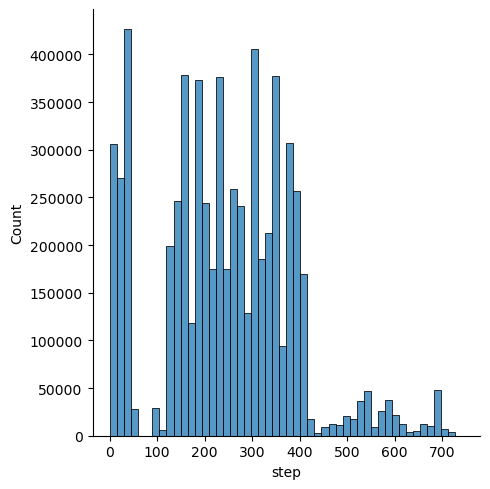

In [43]:
plt.figure(figsize=(15, 6))
sns.displot(data_new['step'], bins=50)

<Axes: xlabel='type', ylabel='amount'>

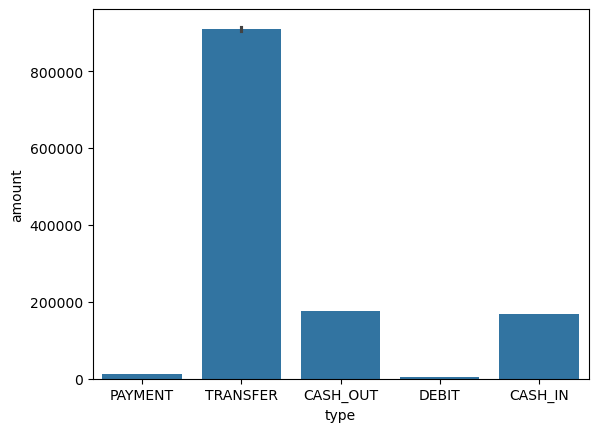

In [45]:
sns.barplot(x='type', y='amount', data=data)

In [51]:
print(f"Accuracy of the model : {accuracy_perfect}%")

Accuracy of the model : 99.91329567589034%
